## Glossary
> - Feature extraction: is usually used when the original data was very different. In particular when you could not have used the raw data. Ex: feature extraction for images
> - Feature exploration: Know exactly what raw data is. Ex: Type of Data, corrilation, missing, outlier.
> - Feature scaling: normalization
> - Feature construction: is the preprocessing use to change raw features into more meaningful features. Ex: instead of using variables x, y, z you decide to use log(x)-sqrt(y)*z instead.
> - Feature selection: Decide to choose some useful features from orginal set. 

___
- Resources:
> - [Machinelearningmastery](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/)
> - [Udacity](https://classroom.udacity.com/courses/ud120)
> - [nyu.edu](https://med.nyu.edu/chibi/sites/default/files/chibi/file7.pdf)
> - [sklearn](http://scikit-learn.org/stable/modules/feature_selection.html)

## Feature selection

- forward selection or backward selection(wrapper): 
$$ X_1, X_2, ... X_m \underset{model}{\mapsto} best(ex: X_1)\underset{add-one-more}{\mapsto}\underset{+model}{\mapsto}best(ex: X_1 + X_2).... \underset{can't-increase-accuracy}{\mapsto} stop$$ 
> - Exhaustive search vs heuristic vs Genetic Algorithms

- Filter: use proxy model to rank original features + threshold or k |--> k best or fit condition
> - $$ X^2, G^2, Pearson r, Fisher Criterion Scoring $$

## sklearn

### Removing features with low variance
- It removes all features whose variance doesn’t meet some threshold

Text(0,0.5,'var')

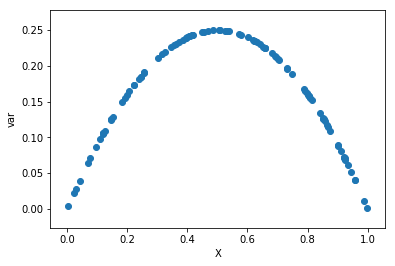

In [18]:
# distribution of p*(1-p)
#---------------------------------------------------#

import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(100)
var = X * (1- X)
plt.scatter(X, var)
plt.xlabel('X')
plt.ylabel('var')

In [4]:
# var(x) = p*(1-p)
#---------------------------------------------------#

from sklearn.feature_selection import VarianceThreshold

X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

### Univariate feature selection(filter)
- For regression: f_regression, mutual_info_regression
- For classification: chi2, f_classif, mutual_info_classif

In [13]:
# Use chi square to filter features
#---------------------------------------------------#

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

iris = load_iris()
X, y = iris.data, iris.target
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
print("X shape:{0},X_new shape:{1}".format(X.shape,X_new.shape))

X shape:(150, 4),X_new shape:(150, 2)


### Feature selection using SelectFromModel

In [14]:
# L1-based feature selection
#---------------------------------------------------#

from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

iris = load_iris()
X, y = iris.data, iris.target
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape
print("X shape:{0},X_new shape:{1}".format(X.shape,X_new.shape))

X shape:(150, 4),X_new shape:(150, 3)
